## Predicting the number of car crashes from a measure of self control (Barratt Impulsiveness Scale Self Control Measure)
**This is private data. Please do not share**

* Date: 2017 - 12 - 22

* Version: 2 
* Editors: Fionn Delahunty 

------- 

This notebook (R code) investigates if Barratt Impulsiveness Scale (BIS) self control measure is a predictor of the number of car crashes in the sample data. 



__Summary of steps__
1. Dataset import 
2. Testing distribution of self control measure 
3. Testing distribution of car crash measure 
4. Investigating the two varibles together 
5. Investigating model using logistic regression
5. Summary
------
* DV <-> Crashes
* IV <-> BIS 


### 1. Dataset Import

In [1]:
# Dataset Import 
data <- read.csv(file="Risklab_2.4.csv", header=TRUE, sep=",")

### 2. Testing distribution of self control measure 

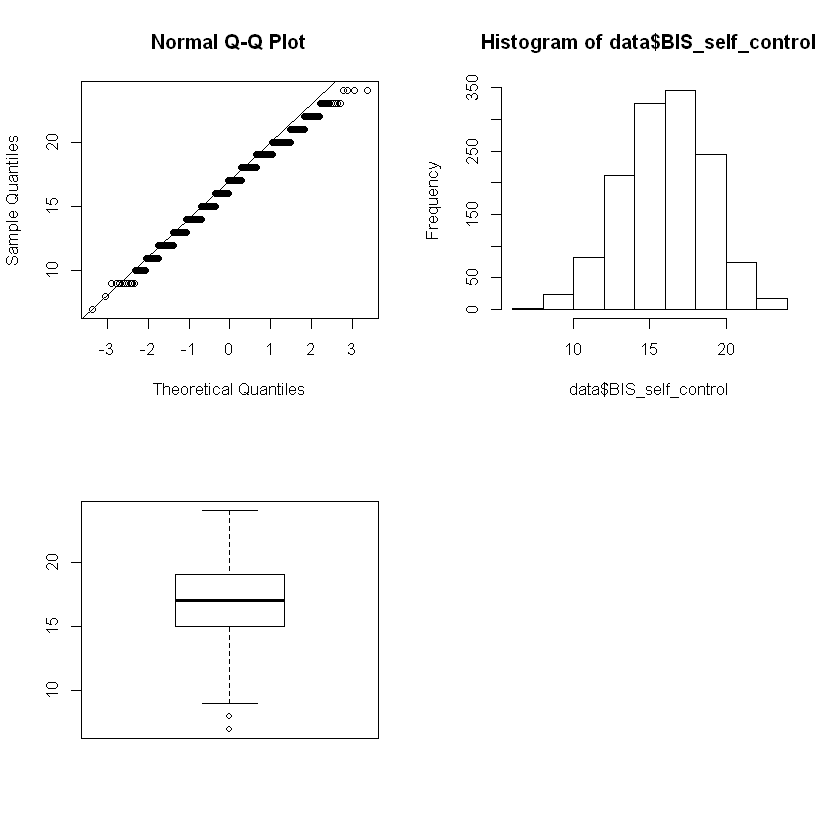

In [2]:
#library(psych)
#describe(data$BIS_self_control)
par(mfrow = c(2,2))

qqnorm(data$BIS_self_control)
qqline(data$BIS_self_control)

hist(data$BIS_self_control)
boxplot(data$BIS_self_control)




#### Comments
Not a prefert fit,but should still work without transformations. There is a few outliners, but I don't see them being an issue. 

---


### 3. Checking distribution of car accidents

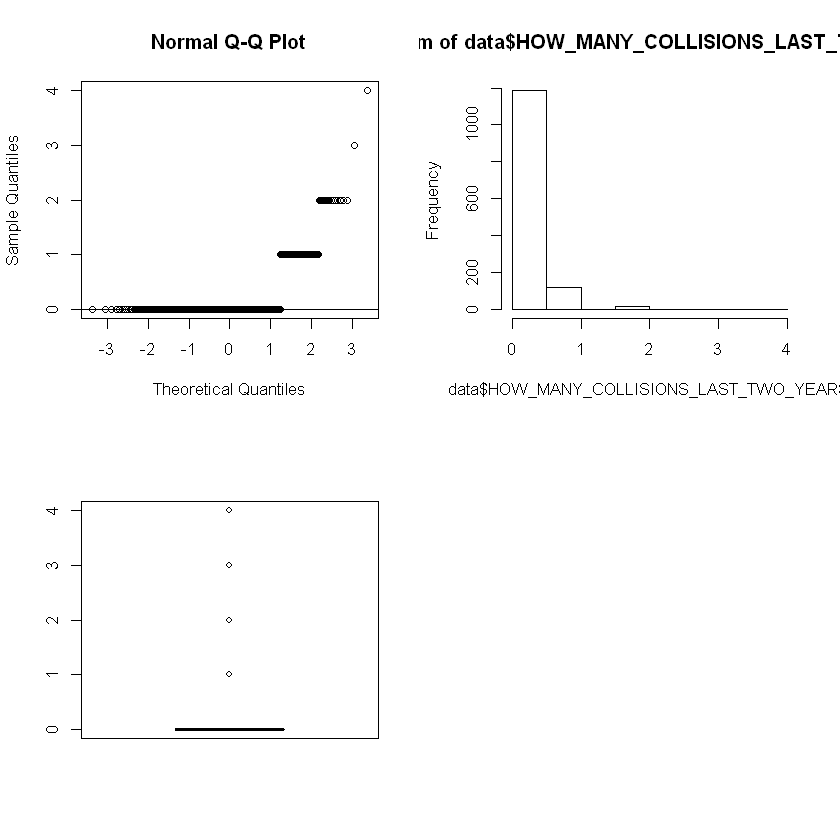

In [5]:
#library(psych)
#describe(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)
par(mfrow = c(2,2))

qqnorm(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)
qqline(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)

hist(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)
boxplot(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)



#### Comments 
This is not good, lots of 0 values. But let's see going forward 

------

### 4. Comparing Self control to car crashes 

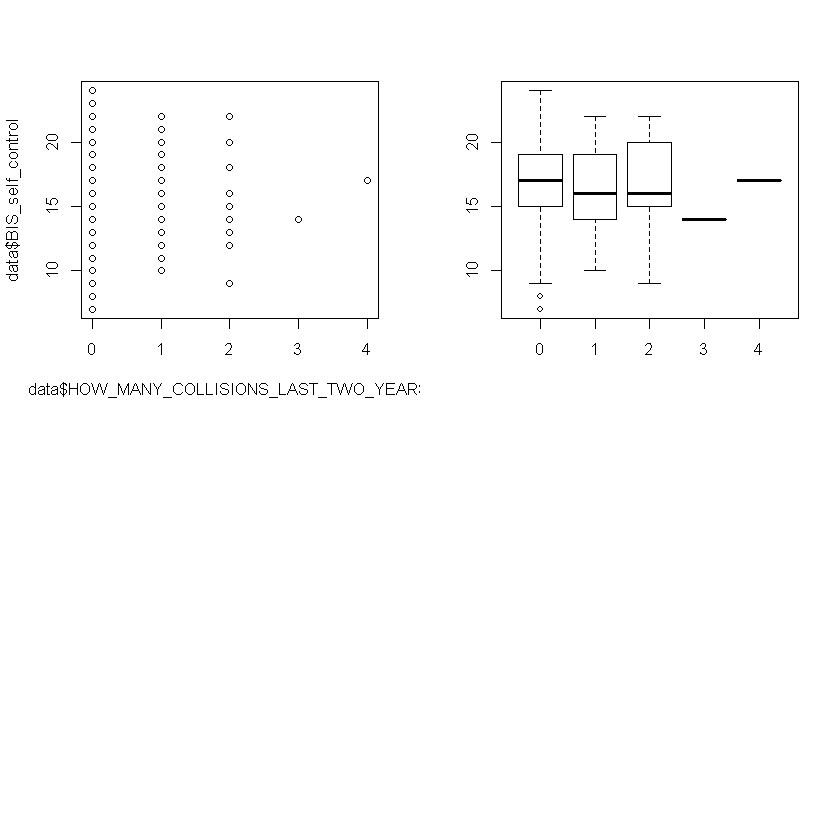

In [6]:
par(mfrow = c(2,2))

plot(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS,data$BIS_self_control)
boxplot(data$BIS_self_control~data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)


#### Comment
We can see a mean difference in BIS between 0 and 1 crashes, while there dose not seem to be a significant mean difference between 1,2,3,4 crashes.

This suggests that we can dichtomise crashes by grouping all crashes above 1 (1,2,3,4) into one group 
In the cell beleow we create a column in the dataframe called "crash" and code it as 
* 0 <- zero crashes
* 1 <- At least 1 crash (Range 1 to 4 crashes in the last two years)

In [7]:
data["Crash"] <- 0
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "0"] <- 0
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "1"] <- 1
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "2"] <- 1
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "3"] <- 1
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "4"] <- 1
data$Crash <- factor(data$Crash)
table(data$Crash)


   0    1 
1187  141 

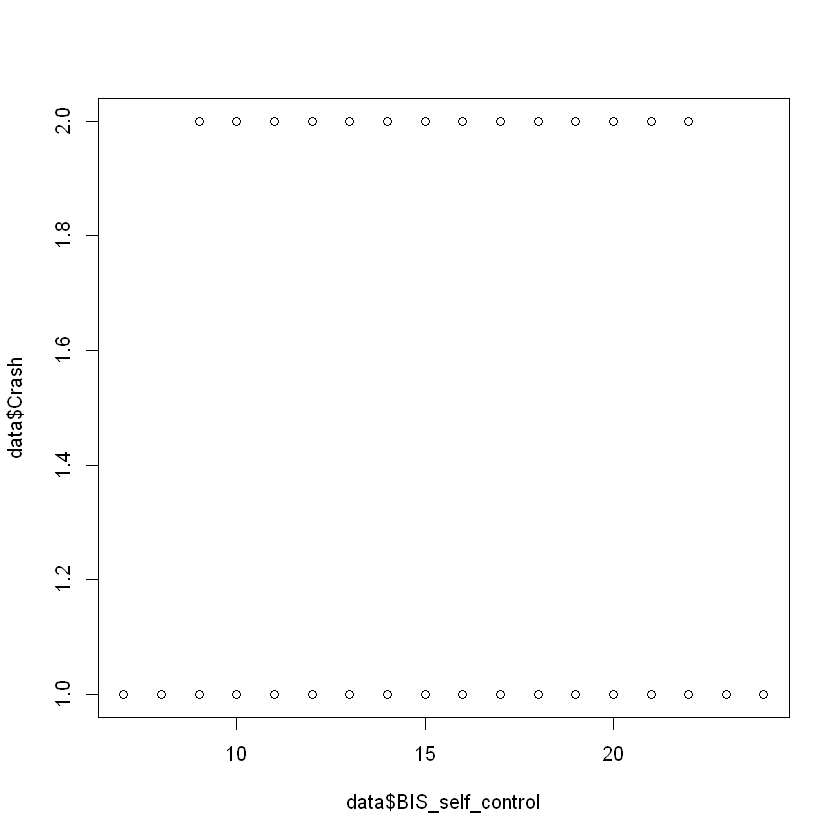

In [7]:
plot(data$BIS_self_control,data$Crash)

Our first test is a standard ANOVA. 

In [8]:
fit <- aov(Crash~ BIS_self_control , data=data)
print(summary(fit))

boxplot(data$BIS_self_control~data$Crash)



Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"

ERROR: Error in levels(x)[x]: only 0's may be mixed with negative subscripts


#### Comments 
Firstly, we note that the ANOVA did not reject the hypothesis. 
We also have two voliations of the assumptions for ANOVA. 
* Very unequal sample size, which we can't really fix. 
* Outliners in both of the dummy groups. Which we could fix, but is not really worth it considering the volation of the group size. 

------

We attempt a Wilcoxon rank test in order to move around these volations 

In [9]:
wilcox.test(data$BIS_self_control~as.factor(data$Crash)) 


	Wilcoxon rank sum test with continuity correction

data:  data$BIS_self_control by as.factor(data$Crash)
W = 86966, p-value = 0.4433
alternative hypothesis: true location shift is not equal to 0


#### Comments 
P value is still very high. Even if there is a difference, it would appear to be only by one point or so




## Logistic Regression


In [10]:
gg<-glm(Crash~BIS_self_control,data=data,family="binomial")
print(summary(gg))


Call:
glm(formula = Crash ~ BIS_self_control, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5198  -0.4807  -0.4713  -0.4621   2.1662  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.78793    0.52164  -3.428 0.000609 ***
BIS_self_control -0.02081    0.03135  -0.664 0.506890    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 898.90  on 1327  degrees of freedom
Residual deviance: 898.46  on 1326  degrees of freedom
AIC: 902.46

Number of Fisher Scoring iterations: 4



## Notes 
* __ Chi-square goodness of fit test: __ = 1, meaning we reject the fit of the binoimal model with logit link. 

In [11]:
#Code taken from 	Rebecka Jörnsten assignments 
par(mfrow = c(2,2))
res<-residuals(gg,"pearson")
plot(logit(gg$fit),res,xlab="linear predictor",ylab="pearson residual")
ll<-loess(res[sort.list(logit(gg$fit))]~sort(logit(gg$fit)))
lines(ll$x,ll$fit,col=2)
abline(h=0,lty=2)
res<-residuals(gg,"deviance")
plot(logit(gg$fit),res,xlab="linear predictor",ylab="dev residual")
ll<-loess(res[sort.list(logit(gg$fit))]~sort(logit(gg$fit)))
lines(ll$x,ll$fit,col=2)
abline(h=0,lty=2)
hh<-hatvalues(gg)
plot(hh,type="h",ylab="leverage",xlab="index")
library(stats)
dd<-cooks.distance(gg)
plot(dd,type="h",ylab="cooks distance",xlab="index")
plot(gg)

ERROR: Error in logit(gg$fit): could not find function "logit"


## Notes 
* __ Pearson Residuals plots: __ Firstly we have lots of values above the |ri| > 2 threshold. The actually fit of the model along the proposed model fit line is quite poor, with tails at either end deviating from the line. We attempted a number of transformations of the x variable (Log/Square root) which had no notificeable effect on either the summary stats or the plot. We suspect the issue here is due to uneven sample size, with the number of 0 values having almost ten times the number of 1 values, we note more about this later.  
* __ Deviance Residuals: __ We have quite a large number of values above the |di| > 2 threshold, suggesting that almost all the 1 values have a significant influence on the log-likelihood. 
* __ Levergae & Cooks Distance: __ We have extreme value in cook distance. 
* __ Link test: __ This test should have been preformed but we couldn't get the R code to work correctly. However, given the other result we would expect the plot not to display a linear tread, but rather a screw. 

## 5. Summary 
In summary our above work shows that in our dataset BIS is not a predicter of the number of car crashes. 
* Mostly we attruite this to the uneven sample size between 1s and 0s. Is there is some suggested methods of fixing this issue ( Gary King and Langche Zeng. 2001.) but I(we) don't have the time for this. 
* I assume there is some problems with my own code and stats. 
